In [10]:
import os
import pandas as pd
import cv2
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

data_dir = 'GTSRB/Training'
max_img_class = 10 

In [11]:
def preprocess(img):
    return cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)


In [12]:
list_images = []
output = []

for dir in os.listdir(data_dir):
    i = 0
    if dir == '.DS_Store' :
        continue
    inner_dir = os.path.join(data_dir, dir)
    csv_file = pd.read_csv(os.path.join(inner_dir,"GT-" + dir + '.csv'), sep=';')
    for row in csv_file.iterrows():
        if i < 100:
            img_path = os.path.join(inner_dir, row[1].Filename)
            img = cv2.imread(img_path)
            img = img[row[1]['Roi.X1']:row[1]['Roi.X2'],row[1]['Roi.Y1']:row[1]['Roi.Y2'],:]
            img = preprocess(img)
            list_images.append(img)
            output.append(row[1].ClassId)
        i += 1


In [13]:
input_array = np.stack(list_images)
train_y = keras.utils.to_categorical(output)

randomize = np.arange(len(input_array))
np.random.shuffle(randomize)

x = input_array[randomize]
y = train_y[randomize]

In [14]:
split_size = int(x.shape[0]*0.6)
train_x, val_x = x[:split_size], x[split_size:]
train1_y, val_y = y[:split_size], y[split_size:]

split_size = int(val_x.shape[0]*0.5)
val_x, test_x = val_x[:split_size], val_x[split_size:]
val_y, test_y = val_y[:split_size], val_y[split_size:]

In [15]:
epochs = 10
batch_size = 16

input_shape = Input(shape=(32, 32,3))

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64,64,3), padding='same'),
    BatchNormalization(),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    
    Flatten(),
    Dense(units=2048, activation='relu'),
    
    Dense(units=1024, activation='relu'),
    BatchNormalization(),
    Dense(units=128, activation='relu'),
    BatchNormalization(),
    Dense(units=43, input_dim=2048, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])
trained_model_conv = model.fit(train_x.reshape(-1,64,64,3), train1_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


162/162 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.2718 - loss: 3.1280 - val_accuracy: 0.4244 - val_loss: 2.7868
Epoch 2/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.7931 - loss: 1.0370 - val_accuracy: 0.8651 - val_loss: 0.8623
Epoch 3/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 15s 90ms/step - accuracy: 0.9204 - loss: 0.5057 - val_accuracy: 0.9477 - val_loss: 0.3733
Epoch 4/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9733 - loss: 0.2656 - val_accuracy: 0.9628 - val_loss: 0.2494
Epoch 5/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9837 - loss: 0.1756 - val_accuracy: 0.9651 - val_loss: 0.2225
Epoch 6/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.9833 - loss: 0.1557 - val_accuracy: 0.9791 - val_loss: 0.1599
Epoch 7/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.9958 - loss: 0.0801 - val_accuracy: 0.9733 - val_loss: 0.1429
Epoch 8/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9960 - loss: 0.0730 - val_accurac

In [16]:
model.evaluate(test_x, test_y)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9679 - loss: 0.1651


[0.15008749067783356, 0.9697674512863159]

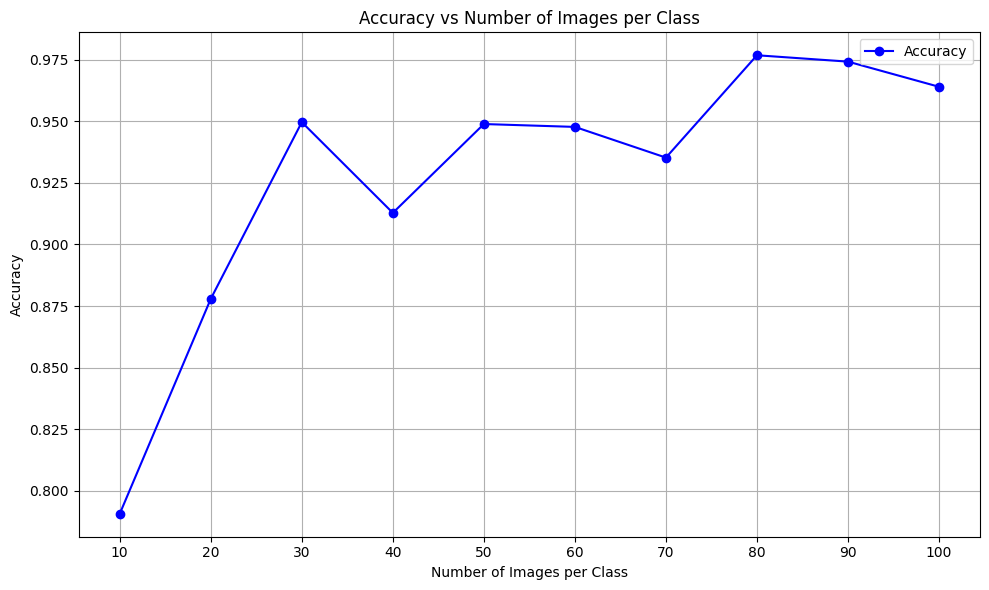

In [17]:
import matplotlib.pyplot as plt


num_sets = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
loss_values = [1.0175367593765259, 0.2790825366973877, 0.28470751643180847, 0.5120207071304321, 0.26673445105552673,
               0.19162970781326294, 0.30504125356674194, 0.10682463645935059, 0.1450781524181366, 0.17813889682292938]
accuracy_values = [0.7906976938247681, 0.8779069781303406, 0.9496123790740967, 0.9127907156944275, 0.9488372206687927,
                   0.9476743936538696, 0.935215950012207, 0.9767441749572754, 0.9741601943969727, 0.9639534950256348]

plt.figure(figsize=(10, 6))
plt.plot(num_sets, accuracy_values, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Accuracy vs Number of Images per Class')
plt.xlabel('Number of Images per Class')
plt.ylabel('Accuracy')
plt.xticks(num_sets)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
